# Activation Functions

### A simple visual showcase of what each activation function does.

## Tanh (Hyperbolic Tangent)

In [1]:
import numpy as np
from dl_lib.activations import (
    tanh, tanh_prime, relu, relu_prime,
    leaky_relu, leaky_relu_prime
)
from demo_helper import plot_tangent_lines
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

In [2]:
graph_scale = 2.5 # How far to extend plots from the origin
X = np.linspace(-1 * graph_scale, graph_scale)
# x coordinates from which we'll draw tangent lines
tangent_X = [-1.5, 0, 1.5]

NameError: name 'pi' is not defined

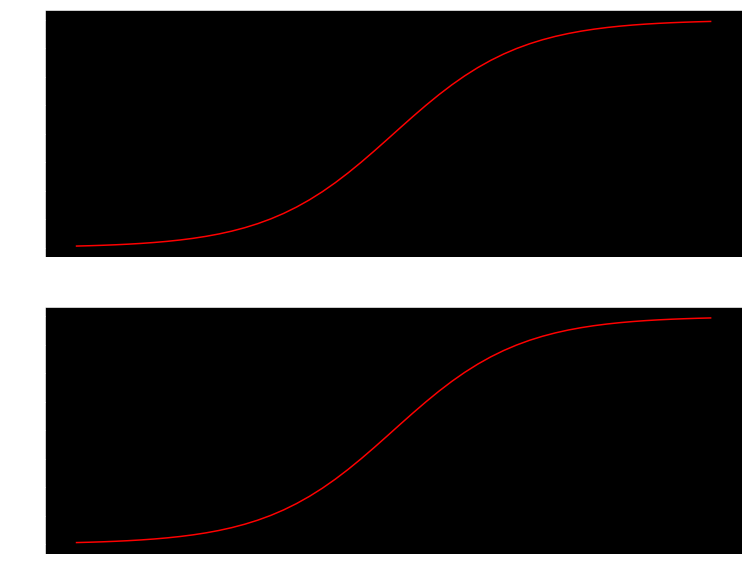

In [3]:
# Plotting our activation function
y = tanh(X)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5 * graph_scale, 10))
axes[0].plot(X, y, color="red")
axes[1].plot(X, y, color="red")

# Plotting our tangent lines
for x in tangent_X:
    y = tanh(x)
    m = tanh_prime(x)
    plot_tangent_lines(axes[1], x, y, m)